# Inports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("Insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# DATA VISUALISATION

/tmp/ipykernel_2899/1059175628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


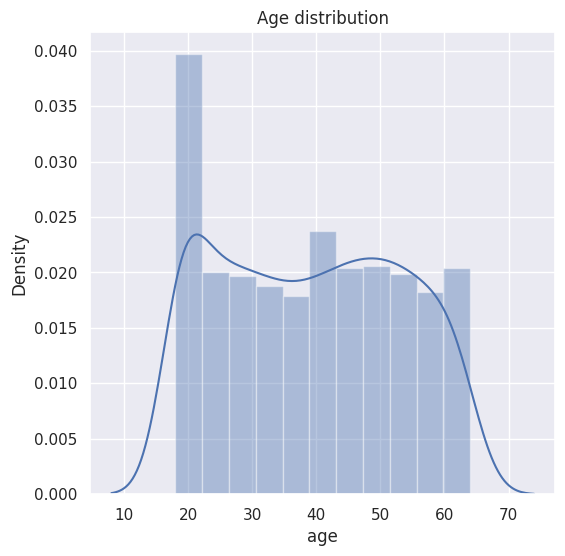

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("Age distribution")
plt.show()

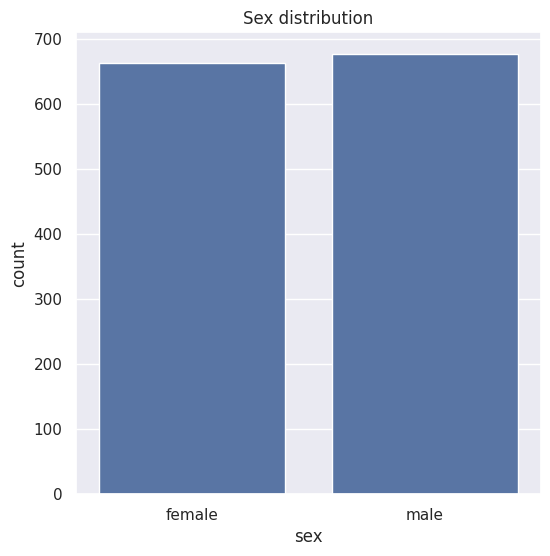

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex distribution")
plt.show()

In [14]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_2899/388080848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


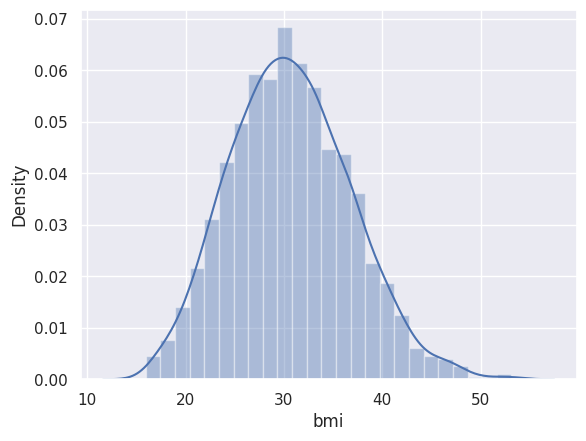

In [15]:
sns.distplot(df["bmi"])
plt.show()

In [16]:
df["region"].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# FEATURE ENCODING

In [21]:
df.replace({"sex":{"male":0,"female":1}},inplace=True)
df.replace({"smoker":{"yes":0,"no":1}},inplace=True)
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [24]:
x=df.drop(columns="charges",axis=1)
y=df["charges"]

# Train SPlit

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

(1070, 6)

# Training the model

In [30]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
pred=reg.predict(x_train) ##TrainING FOR TRAIN DATA
r2_score(y_train,pred)

0.753055764316608

In [38]:
pred=reg.predict(x_test) ##TESING FOR TRAIN DATA
r2_score(y_test,pred)

0.7358939454124476

# Prediction System

In [41]:
sample_data=(30,1,22.7,0,1,0)
input_data=np.asarray(sample_data)
input_data

array([30. ,  1. , 22.7,  0. ,  1. ,  0. ])

In [42]:
input_data_reshaped=input_data.reshape(1,-1)
input_data_reshaped

array([[30. ,  1. , 22.7,  0. ,  1. ,  0. ]])

In [43]:
prediction=reg.predict(input_data_reshaped)
print("The Insurance Cost is :",prediction)

The Insurance Cost is : [2832.13377635]


/home/mayank/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
